In [1]:

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

# 나눔고딕 경로 찾기 (macOS 기준)
font_path = fm.findfont("NanumGothic")
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트와 마이너스 기호 깨짐 방지 설정
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False



path = "./csv_dir/hotel_data_modified.csv"
df = pd.read_csv(path)
df



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,394.0,NaN,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,9.0,NaN,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,9.0,NaN,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,89.0,NaN,0,0,0,Check-Out,2017-09-07


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000


#### 가장 먼저 취소가 됐으면 예약 상태가 캔슬이거나 노쇼여야함

In [4]:
df[(df['is_canceled'] == 0) & ((df['reservation_status'] == "Canceled") | (df['reservation_status'] == "No-Show"))]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


# 결측치 존재 확인

<Axes: >

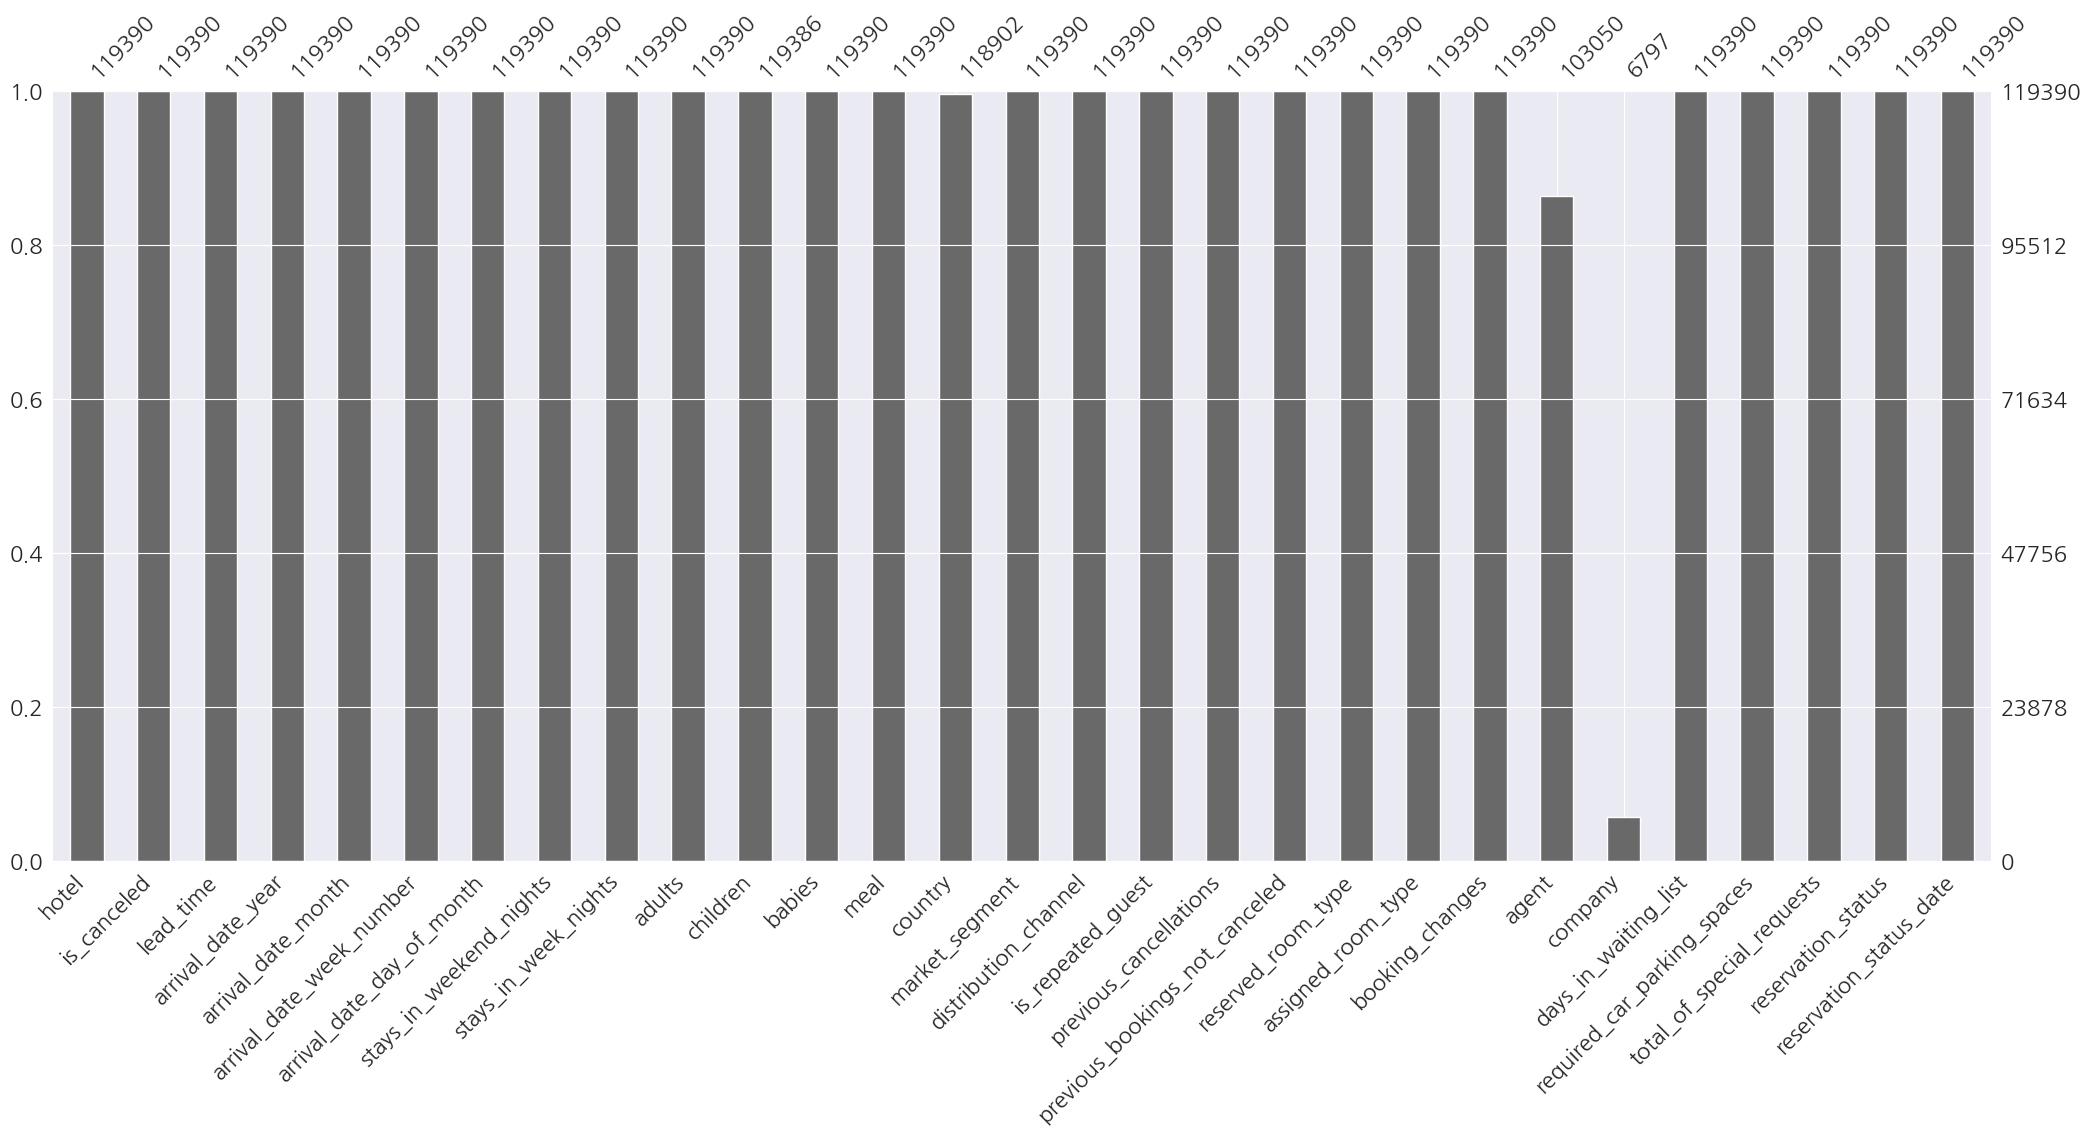

In [5]:
msno.bar(df)

# 결측치끼리의 관계
- children -> 관계 없는 거 같음
- agent -> company와 -0.57정도
- company -> agent와 -0.57정도
- country -> 관계 없는 거 같음

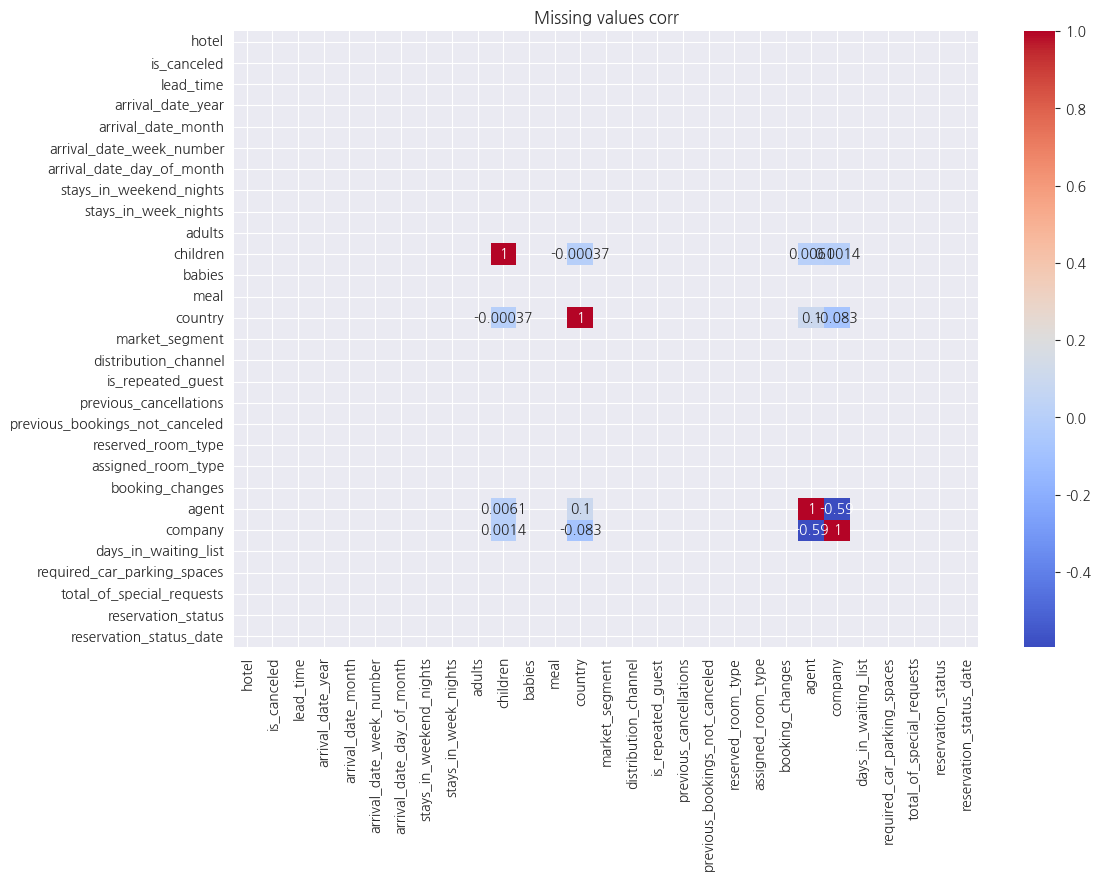

In [6]:
# 각 열마다 결측이면 1
missing_df = df.isnull().astype(int)

# 결측치끼리의 상관관계 구하기
corr = missing_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Missing values corr")
plt.show()

# 중복값 처리.
### 모든 독립변수가 같다면 중복값이라고 처리함.

In [7]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,A,1,250.0,NaN,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,E,0,250.0,NaN,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,D,0,240.0,NaN,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,A,0,240.0,NaN,0,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03


In [8]:
# 중복된 행 제거
df = df.drop_duplicates()

In [9]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,394.0,NaN,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,9.0,NaN,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,9.0,NaN,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,89.0,NaN,0,0,0,Check-Out,2017-09-07


In [10]:
print("아이의 평균",df['children'].mean())
print("아이의 표준 편차:",df['children'].std())
print("아이의 중앙값:",df['children'].median())
df['children'].value_counts()

아이의 평균 0.13992327573218363
아이의 표준 편차: 0.45780825634153954
아이의 중앙값: 0.0


children
0.0     77949
1.0      4678
2.0      3580
3.0        75
10.0        1
Name: count, dtype: int64

In [11]:
# 'children' Missing Value는 1번재 최빈값으로 처리함 => 1명으로
df.loc[:, 'children'] = df['children'].fillna(df['children'].mode()[0])

# 'children' outlier 처리하기
q1 = np.percentile(df['children'], 25)
q2 = np.percentile(df['children'], 50)
q3 = np.percentile(df['children'], 75)
iqr = q3 - q1
lower_iqr = q1 - 1.5 * iqr
upper_iqr = q3 + 1.5 * iqr

print(lower_iqr,upper_iqr)
# 0, 0
# 1명을 10명으로 잘못 입력 했을 거 같음
# 위쪽 outlier도 0인데 음 그냥 10명인 사람은 1명으로 치환


# company 112593

0.0 0.0


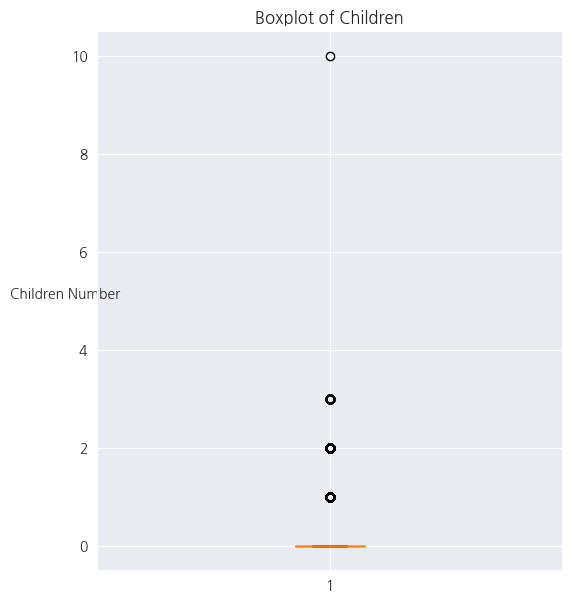

In [12]:
# children 열 박스 플롯
plt.figure(figsize=(6, 7))
plt.boxplot(df['children'],
            patch_artist=True,   # 박스 색 채우기
            )
plt.title("Boxplot of Children")
plt.ylabel("Children Number", rotation=0)
plt.show()

In [13]:
# 아이가 10명인 사람 이상치로 간주하고 1명으로 치환
df.loc[:,'children'] = df['children'].replace(10,0)
# 아이가 3인 사람도 이상치로 간주 , 말은 되지만 표본수가 너무 적어서...
df.loc[:,'children'] = df['children'].replace(3,0)
df['children'].value_counts()

children
0.0    78029
1.0     4678
2.0     3580
Name: count, dtype: int64

In [14]:
df['children'].isnull().sum()
# children 컬럼 null 0개임을 확인

np.int64(0)

# Country 열의 결측치 처리

In [15]:
df[df['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,A,A,2,NaN,NaN,0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,P,P,0,NaN,383.0,0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,A,A,0,NaN,204.0,0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,A,A,0,NaN,NaN,0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,A,A,0,NaN,457.0,0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,...,P,P,0,NaN,279.0,0,0,0,Canceled,2016-11-17
61244,City Hotel,1,0,2016,December,50,6,0,0,0,...,P,P,0,NaN,279.0,0,0,0,Canceled,2016-12-06
65907,City Hotel,1,0,2017,April,15,10,0,0,0,...,P,P,0,NaN,279.0,0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,A,A,0,37.0,NaN,0,0,0,Check-Out,2015-11-26


포르투갈 사람이 가장 많아서 451명을 포르투갈 사람으로 대치함


In [16]:
df['country'].describe()
df.loc[:,'country'] = df['country'].fillna(df['country'].mode()[0])

In [17]:
# country 컬럼의 널값 0임을 확인
df['country'].isnull().sum()

np.int64(0)

In [18]:
df['agent'].isnull().sum()
# 11988개의 널

np.int64(11988)

### agent가 널 값인 행의 개수는 11988개 대충 10% 정ㅇ도

In [19]:
df['agent'].isnull().sum()

np.int64(11988)

## 11988개의 널값을 어떻게 할 것인가?
입력이 없어서 NULL인 것인지, 여행사를 통한 예약을 안 해서 NULL인 것인지 확인하기

In [20]:
df['agent'].value_counts()

agent
9.0      28567
240.0    12905
14.0      3332
7.0       3287
250.0     2757
         ...  
337.0        1
510.0        1
165.0        1
358.0        1
449.0        1
Name: count, Length: 333, dtype: int64

## 에이전트가 null인 것의 예약 유통 채널 확인

- 이론상 여행사의 아이디를 일부러 안 적었다면 유통 채널이 모두 direct여야함.
확인 결과 아님. coporate, TA 섞여 있음
- 그러면 그냥 "Unknown" 값으로 대체

In [21]:
dis = df[df['agent'].isnull() & df['distribution_channel']]
dis['distribution_channel'].value_counts()

distribution_channel
Direct       6519
Corporate    4314
TA/TO        1150
Undefined       3
GDS             2
Name: count, dtype: int64

In [22]:
# Unknown으로 대체
df.loc[:,'agent'] = df['agent'].fillna("Unknown")

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3365556180.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Unknown' 'Unknown' 'Unknown' ... 9.0 89.0 9.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:,'agent'] = df['agent'].fillna("Unknown")


In [23]:
df['agent'].isnull().sum()
# NULL값 0개임을 확인

np.int64(0)

# Company 열의 결측치 처리
총 데이터 119390개 중에서 112593개의 행이 널값임. --> 약 95%가 NULL, 따라서 컬럼 자체를 날려버리도록함.

In [24]:
df.drop('company', axis=1, inplace=True)

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3631134913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('company', axis=1, inplace=True)


In [25]:
# company 컬럼 삭제 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86287 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86287 non-null  object 
 1   is_canceled                     86287 non-null  int64  
 2   lead_time                       86287 non-null  int64  
 3   arrival_date_year               86287 non-null  int64  
 4   arrival_date_month              86287 non-null  object 
 5   arrival_date_week_number        86287 non-null  int64  
 6   arrival_date_day_of_month       86287 non-null  int64  
 7   stays_in_weekend_nights         86287 non-null  int64  
 8   stays_in_week_nights            86287 non-null  int64  
 9   adults                          86287 non-null  int64  
 10  children                        86287 non-null  float64
 11  babies                          86287 non-null  int64  
 12  meal                            8628

# 다른 수치형 컬럼의 이상치 확인하기

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86287 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86287 non-null  object 
 1   is_canceled                     86287 non-null  int64  
 2   lead_time                       86287 non-null  int64  
 3   arrival_date_year               86287 non-null  int64  
 4   arrival_date_month              86287 non-null  object 
 5   arrival_date_week_number        86287 non-null  int64  
 6   arrival_date_day_of_month       86287 non-null  int64  
 7   stays_in_weekend_nights         86287 non-null  int64  
 8   stays_in_week_nights            86287 non-null  int64  
 9   adults                          86287 non-null  int64  
 10  children                        86287 non-null  float64
 11  babies                          86287 non-null  int64  
 12  meal                            8628

In [27]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist() # 수치형

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

수상한 값들 확인하기
- stays_in_week_nights 맥스가 50임 -> 거의 10주동안 예약인데
- stays_in_weekend_nights 맥스가 19임 -> 거의 10주동안 예약인데 623만원으로 예약이 가능함. 처리 해야되나...?
#### 아고다에서 2달치 해보니깐 가능함
- https://www.agoda.com/ko-kr/new-organi-lisbon/hotel/lisbon-pt.html?countryId=213&finalPriceView=1&isShowMobileAppPrice=false&cid=1922868&numberOfBedrooms=&familyMode=false&adults=1&children=0&rooms=1&maxRooms=0&checkIn=2025-08-22&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=0&showReviewSubmissionEntry=false&currencyCode=KRW&isFreeOccSearch=false&tag=f6f78b7d-895a-4646-8ea3-4f857fbaf881&tspTypes=2%2C8&los=64&searchrequestid=26dfe10f-46d8-4681-baf2-a9fbc6e03285&ds=uKVJGiHQGVMHLvub
- 어른 맥스가 55임 => 한 방에 가능하냐??
- 아기 맥스가 10 -> 의자왕인듯. 이상치로 생각
- 이전 취소가 맥스가 26번
- 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수 맥스ㅏ 72
- 예약 시점부터 예약 취소/체크인 시점까지 에약에 대한 변경/수정 횟수 맥스가 21
- booking_changes도 보기
- days in waiting list보기
- 주차 요구 맥스 8
- total 이상치 확인하기

In [28]:
# 1. stays_in_weekend_nights 맥스가 19임 == 9주를 예약함
# 장기출장인가
over_weekend_nine = df[df['stays_in_weekend_nights'] > 8]
over_weekend_nine.loc[:,['is_canceled','stays_in_weekend_nights', 'stays_in_week_nights']]

,is_canceled,stays_in_weekend_nights,stays_in_week_nights
1655,0,13,33
3820,1,12,30
3850,0,12,30
5344,1,9,24
9333,1,9,21
9334,1,9,21
9839,1,16,40
14037,0,18,42
14038,0,19,50
14039,0,9,21


In [29]:
# 2. stays_in_week_nights 맥스가 50임
df['stays_in_week_nights'].value_counts()
over_week_nights = df[df['stays_in_week_nights'] > 8]
over_week_nights.loc[:,['is_canceled','stays_in_weekend_nights', 'stays_in_week_nights']]

,is_canceled,stays_in_weekend_nights,stays_in_week_nights
30,0,4,10
31,0,4,11
52,0,4,10
85,0,4,10
86,0,4,10
...,...,...,...
117482,0,4,9
117821,0,4,12
118403,0,2,10
118478,0,3,9


#### 그럼 평일이 0일이면 주말이 1이상 and 주말이 0이면 평일이 1이상
#### 평일 6일을 예약하면 주말이 1일이상이어야함. 오류 찾기
#### 모두 정상임

In [30]:

df[(df['stays_in_week_nights'] >= 6) & (df['stays_in_weekend_nights'] < 1)]
# df[(df['stays_in_week_nights'] >= 11) & (df['stays_in_weekend_nights'] < 4)]
# df[(df['stays_in_week_nights'] >= 16) & (df['stays_in_weekend_nights'] < 6)]
# df[(df['stays_in_week_nights'] > 21) & (df['stays_in_weekend_nights'] < 8)]
# df[(df['stays_in_week_nights'] > 26) & (df['stays_in_weekend_nights'] < 10)]
# df[(df['stays_in_week_nights'] > 31) & (df['stays_in_weekend_nights'] < 12)]
# df[(df['stays_in_week_nights'] > 36) & (df['stays_in_weekend_nights'] < 14)]
# df[(df['stays_in_week_nights'] > 41) & (df['stays_in_weekend_nights'] < 16)]
# df[(df['stays_in_week_nights'] > 46) & (df['stays_in_weekend_nights'] < 18)]
# df[(df['stays_in_week_nights'] > 51) & (df['stays_in_weekend_nights'] < 20)]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


#### adults 이상치 처리
#### IQR에 따르면 3명 이상부터 이상치로 처리.
#### 하지만 상식적으로 3명까지 가능하다고 봄.
#### 4명부터 이상치 처리
어른이 없는 경우도 확인하기

In [31]:
df['adults'].value_counts()

adults
2     63692
1     16219
3      5917
0       383
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [32]:
df['adults'].describe()
# 가장 많은 2인으로 바꾸겠음

count    86287.000000
mean         1.877328
std          0.628117
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

2.0 2.0


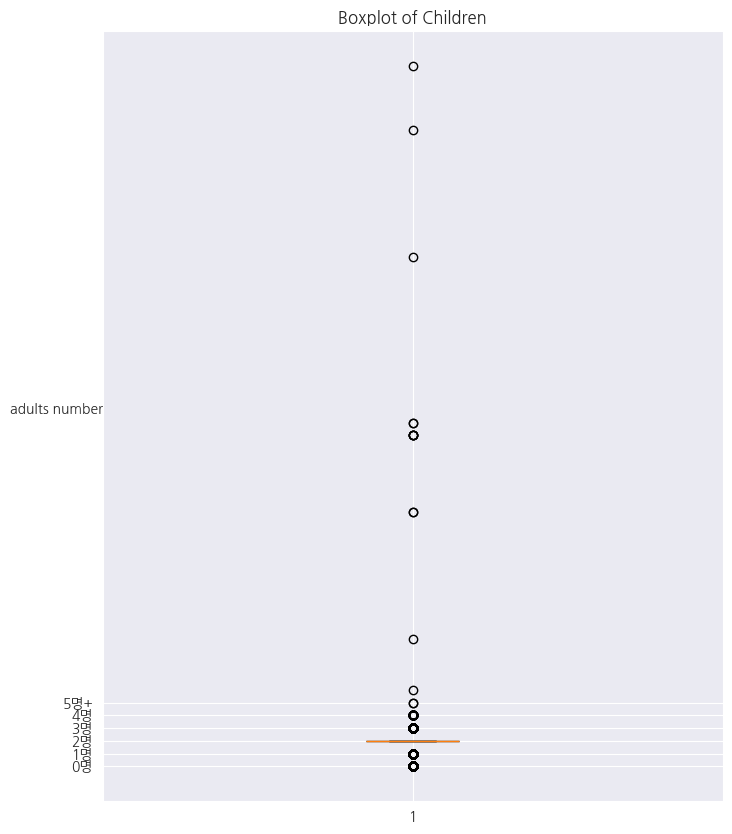

In [33]:
q1 = np.percentile(df['adults'], 25)
q2 = np.percentile(df['adults'], 50)
q3 = np.percentile(df['adults'], 75)
iqr = q3 - q1
lower_iqr = q1 - 1.5 * iqr
upper_iqr = q3 + 1.5 * iqr

print(lower_iqr, upper_iqr)

plt.figure(figsize=(8, 10))
plt.boxplot(df['adults'],
            patch_artist=True,  # 박스 색 채우기
            )
plt.title("Boxplot of Children")
ticks = [0, 1, 2, 3, 4, 5]   # 눈금 위치
labels = ["0명", "1명", "2명", "3명", "4명", "5명+"]  # 라벨
plt.yticks(ticks, labels)
plt.ylabel("adults number", rotation=0)
plt.show()

In [34]:
# 4인 이상을 2(최빈값)인으로 대치함
df.loc[df['adults'] >= 4, 'adults'] = df['adults'].mode()[0]

#### 어린이: 중고등정도...? 구글...
The answer to this question in international and domestic law is clear: a child is anyone under the age of 18.
### 제거해야 할 목록

1. 어른이 없는 경우 & 어린이가 없는 경우 & 아기가 없는 경우
2. 어른이 없는 경우 & 어린이가 없는 경우 % 아기가 있는 경우
3. 어른이 없는 경우 & 어린이 있는 & 아기가 있는 => 10대 가능하다고 봄
4. 어른이 없는 경우 & 어린이 있는 & 아기가 없는 => 10대 가능하다고 봄

### 어른이 없는 경우 & 주차 공간이 필요한 row도 제거해야할듯 => 서양은 학생도 차 타고 다니니깐 + 차 1대 정도는 렌트해서 할 수 있다고 생각

In [35]:
# 1.
df = df.drop(df[(df['adults'] == 0) &
                (df['children'] == 0) &
                (df['babies'] == 0)].index)

In [36]:
# 삭제 확인
df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [37]:
# 2. 없음
df[((df['adults'] == 0) & (df['children'] == 0)) & (df['babies'] >= 1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [38]:
# 3.
df[(df['adults'] == 0) & df['required_car_parking_spaces'] > 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
86799,City Hotel,0,0,2016,April,15,8,0,1,0,...,0,F,B,0,9.0,0,1,0,Check-Out,2016-04-09
104879,City Hotel,0,16,2017,January,3,20,2,2,0,...,0,B,B,1,Unknown,0,1,1,Check-Out,2017-01-24


In [80]:
#어른이 없는 경우 & 어린이 있는 & 아기가 없는
df = df.drop(df[(df['adults'] == 0) & (df['children'] != 0) & (df['babies'] == 0)].index)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,C,3,Unknown,0,0,0,Check-Out,2015-07-01,"(300, 350]"
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,C,4,Unknown,0,0,0,Check-Out,2015-07-01,"(600, 737]"
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,A,C,0,Unknown,0,0,0,Check-Out,2015-07-02,"(-1, 50]"
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,A,0,304.0,0,0,0,Check-Out,2015-07-02,"(-1, 50]"
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,A,0,240.0,0,0,1,Check-Out,2015-07-03,"(-1, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,A,A,0,394.0,0,0,0,Check-Out,2017-09-06,"(-1, 50]"
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,E,E,0,9.0,0,0,2,Check-Out,2017-09-07,"(100, 150]"
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,D,D,0,9.0,0,0,4,Check-Out,2017-09-07,"(-1, 50]"
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,A,A,0,89.0,0,0,0,Check-Out,2017-09-07,"(100, 150]"


# 아기 이상치 처리하기

In [40]:
df['babies'].value_counts()
# 아기 9명, 10명은 에바임

babies
0     84994
1       896
2        15
10        1
9         1
Name: count, dtype: int64

In [41]:
df = df.drop(df[df['babies'] >= 9].index)

In [42]:
# 삭제 확인
df[df['babies'] >= 9]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### 현재 예약 이전에 고객이 취소하지 않은 이전 예약 수 Max 72
#### 그 방이 연속적으로 72번 취소되지않았따는건가...
### 이전 취소가 max 26번
#### 나 이전에 A라는 사람이
뭔 소린지 모르겠네


In [43]:
df['previous_cancellations'].value_counts()

previous_cancellations
0     84243
1      1388
2       110
3        60
4        30
11       27
5        19
6        17
13        4
24        2
26        1
25        1
14        1
19        1
21        1
Name: count, dtype: int64

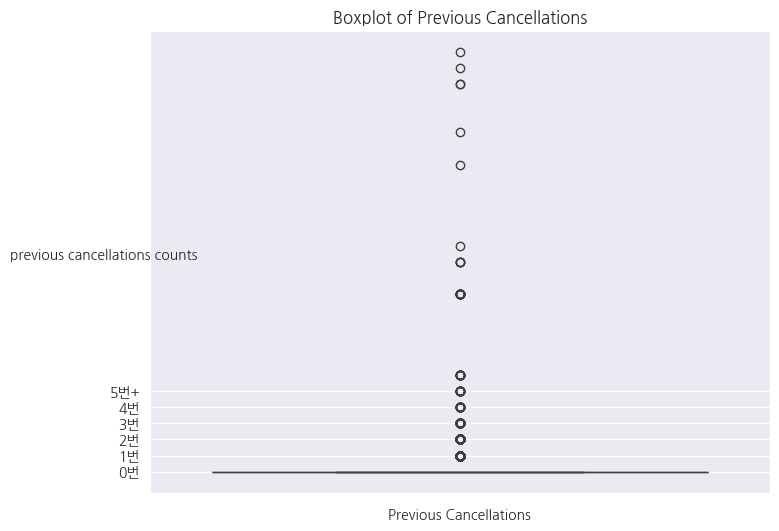

In [44]:
# 박스플롯 그리기

plt.figure(figsize=(8, 6))
sns.boxplot(data = df['previous_cancellations'], patch_artist=True, )
plt.title("Boxplot of Previous Cancellations")

ticks = [0, 1, 2, 3, 4, 5]
labels = ["0번", "1번", "2번", "3번", "4번", "5번+"]
plt.yticks(ticks, labels)
plt.ylabel("previous cancellations counts", rotation=0)

plt.xlabel("Previous Cancellations")
plt.show()

In [45]:
# 5번 이상인 행들 모아서 보기
df[df['previous_cancellations'] >= 5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14779,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,A,A,0,208.0,0,0,0,Canceled,2015-01-30
14829,Resort Hotel,1,222,2015,September,38,15,1,5,2,...,0,A,A,0,252.0,0,0,0,Canceled,2015-03-03
14885,Resort Hotel,1,265,2015,September,39,24,1,3,2,...,0,A,A,0,183.0,0,0,0,Canceled,2015-04-02
14972,Resort Hotel,1,166,2015,July,29,15,0,2,2,...,0,A,A,0,Unknown,0,0,0,Canceled,2015-04-28
14997,Resort Hotel,1,244,2015,September,36,3,0,3,2,...,0,A,A,0,Unknown,0,0,0,Canceled,2015-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94396,City Hotel,0,1,2017,July,28,12,0,1,1,...,17,A,A,0,Unknown,0,0,3,Check-Out,2017-07-13
94397,City Hotel,0,0,2017,August,31,1,0,1,1,...,18,A,A,0,Unknown,0,0,3,Check-Out,2017-08-02
94398,City Hotel,0,1,2017,August,32,8,0,1,1,...,19,A,C,1,Unknown,0,0,3,Check-Out,2017-08-09
94399,City Hotel,0,0,2017,August,33,15,0,1,1,...,20,A,A,0,Unknown,0,0,3,Check-Out,2017-08-16


In [86]:
# 예약이 확정되기 전까지 해당 예약이 예약 대기자 명단에 있었던 일수
# 호텔을 몇십일씩 대기하면서까진 않을거라고 생각함
# 1이상은 0으로 치환함
df['days_in_waiting_list'].value_counts()
# sns.boxplot(data = df, x = df['days_in_waiting_list'])

days_in_waiting_list
0    85872
Name: count, dtype: int64

In [85]:
df.loc[df['days_in_waiting_list'] >= 1, 'days_in_waiting_list'] = 0

#### 고객이 요구하는 주차 공간 수
#### 1대까진 이해 가능, 8대만 삭제하기.

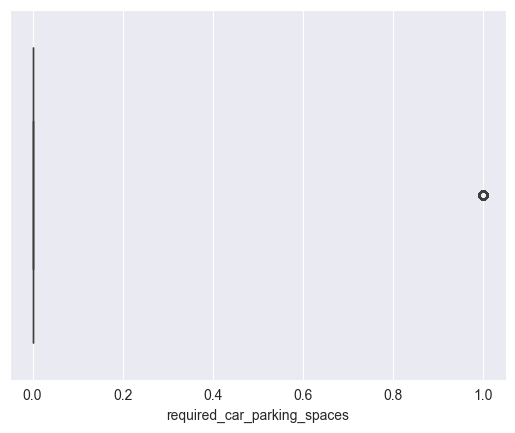

In [87]:
sns.boxplot(data=df, x='required_car_parking_spaces')
plt.show()
# 1부터 이상치임, 1대, 2대, 3대, 8개 다 합해서 7400row 정도, 이거 날리나

In [88]:
df['required_car_parking_spaces'].value_counts()
df = df.drop(df[df['required_car_parking_spaces'] >= 2].index)

In [89]:
# 삭제 확인
df['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    78645
1     7227
Name: count, dtype: int64

#### 몇 번 스페셜 요청을 했는지 확인
#### 이상치는 3부터, 최빈값으로 대체하기

In [92]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    45676
1    28556
2    11640
Name: count, dtype: int64

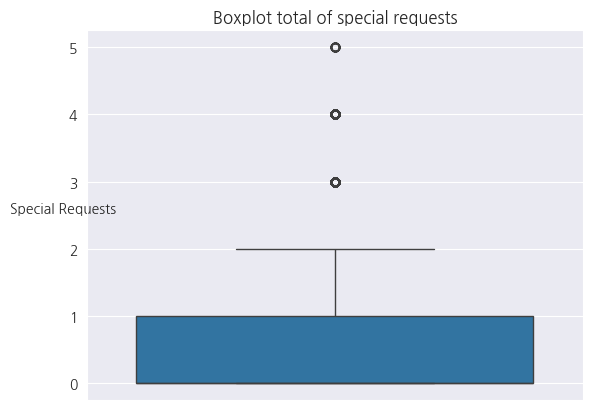

In [51]:
sns.boxplot(data = df['total_of_special_requests'],)
plt.title("Boxplot total of special requests")
plt.ylabel("Special Requests", rotation=0)
plt.show()

In [91]:
df.loc[df['total_of_special_requests'] >= 3, 'total_of_special_requests'] = 0

### 예약 시점부터 예약 취소/체크인 시점까지 에약에 대한 변경/수정 횟수
1도 이상치라고 나오지만 수정/변경은 여러번도 할 수 있다고 생각함. 이대로 유지

In [52]:
df['booking_changes'].value_counts()

booking_changes
0     70385
1     10613
2      3437
3       850
4       345
5       111
6        57
7        28
8        14
9         8
10        6
13        5
14        3
15        3
17        2
16        2
12        1
18        1
11        1
Name: count, dtype: int64

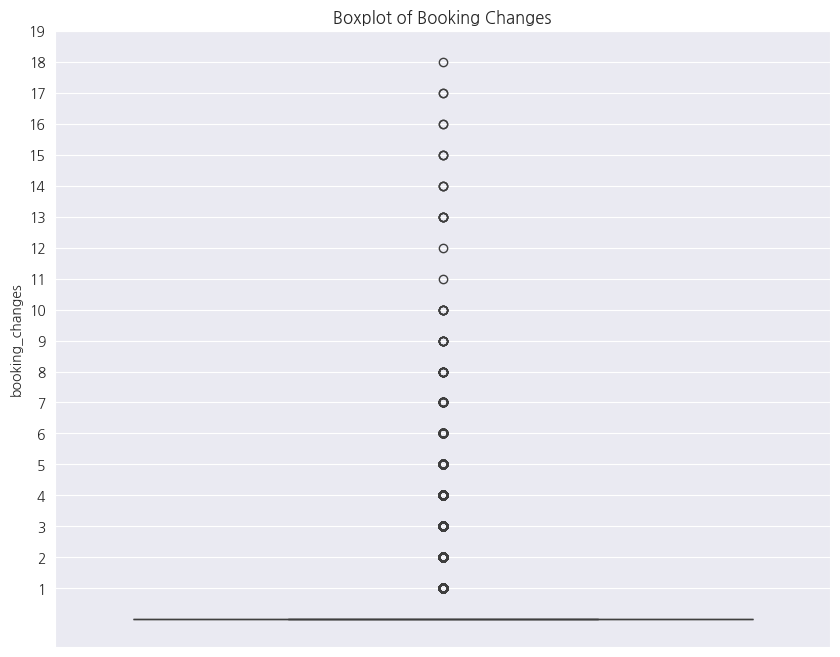

In [53]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = df['booking_changes'],)

plt.title("Boxplot of Booking Changes")
y_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
plt.yticks(y_label, rotation=0)
plt.show()

## 전체 수치형간의 corr 확인

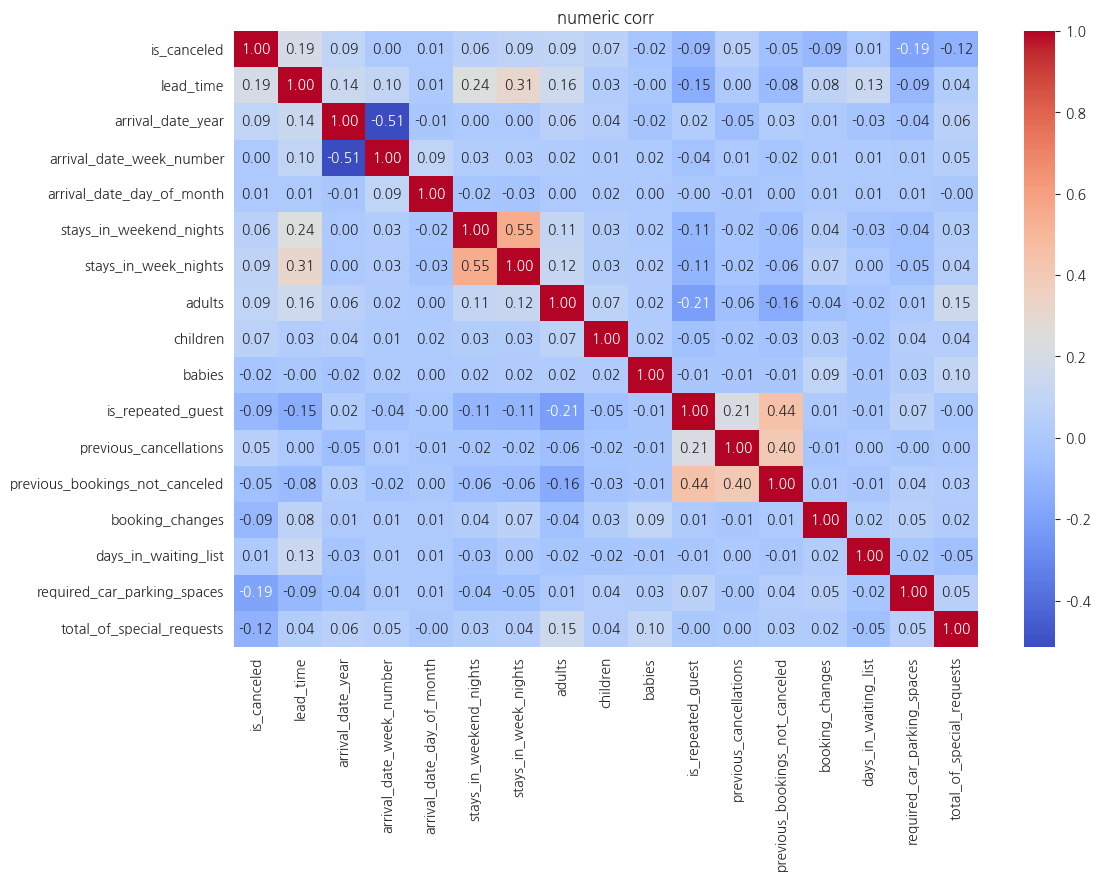

In [54]:
# 수치형 컬럼만 추출
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 인코딩된 범주형 확인하기


# 수치형 컬럼들의 상관관계 구하기
corr_numeric = numeric_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12,8))
sns.heatmap(corr_numeric, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("numeric corr")
plt.show()
# 공분산
# 각값이 평균에서 얼마나 떨어져있냐

# 범주형 데이터 이상치 확인하기

In [55]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'agent',
 'reservation_status',
 'reservation_status_date']

In [56]:
# hotel 이상 없음
df['hotel'].value_counts()

hotel
City Hotel      52538
Resort Hotel    33334
Name: count, dtype: int64

In [57]:
# 고객의 호텔 도착 월   이상 없음
df['arrival_date_month'].value_counts()

arrival_date_month
August       11085
July          9896
May           8215
April         7780
June          7655
March         7364
October       6773
September     6540
February      5991
December      5044
November      4921
January       4608
Name: count, dtype: int64

In [58]:
df['reserved_room_type'].value_counts()

reserved_room_type
A    55578
D    17207
E     5952
F     2804
G     2042
C      907
B      782
H      594
L        6
Name: count, dtype: int64

In [59]:
df['assigned_room_type'].value_counts()
# i랑 k가 없음. 강제 이동인듯.

assigned_room_type
A    45515
D    22204
E     7090
F     3604
G     2485
C     2123
B     1610
H      704
I      352
K      184
L        1
Name: count, dtype: int64

In [60]:
df['agent'].value_counts()

agent
9.0        28353
240.0      12894
Unknown    11909
14.0        3309
7.0         3277
           ...  
291.0          1
483.0          1
472.0          1
446.0          1
449.0          1
Name: count, Length: 334, dtype: int64

In [61]:
# 마지막 예약 상태 + lead_time이 호텔 체크인 날짜와 같은가도 봐야하나....
df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

- Undefined/SC: 식사 포함되지 않은 옵션
- BB: Bed & Breakfast 옵션
- HB: Half board (아침 식사 및 추가 식사 1회 - 일반적으로 저녁 식사) 옵션
- FB: Full board (아침, 점심, 저녁)
### SC랑 Undefined을 합쳐서 SC 하나로 보는게 편할듯?

In [62]:
df['meal'].value_counts()
df.loc[:,'meal'] = df['meal'].replace('Undefined', 'SC')

In [63]:
df['meal'].value_counts()
# 9,808

meal
BB    66849
SC     9805
HB     8863
FB      355
Name: count, dtype: int64

# Arrival_date_MOnth 컬럼이 보기 불편해서 바꿈 + 후에 정렬하려고 April -> float(4)

In [64]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df.loc[:,'arrival_date_month'] = df['arrival_date_month'].replace(month_map)
df['arrival_date_month'].value_counts()

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/2815250558.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:,'arrival_date_month'] = df['arrival_date_month'].replace(month_map)


arrival_date_month
8     11085
7      9896
5      8215
4      7780
6      7655
3      7364
10     6773
9      6540
2      5991
12     5044
11     4921
1      4608
Name: count, dtype: int64

# 취소율에 영향을 줄 거 같은 변수들


1. City가 Resort보다 높을 것이다. / 리조트는 대부분 작정하고 가니깐...
2. lead_time이 길수록 취소율이 높을 것이다. / 너무 먼 미래니깐
3. 년도 별로는 취소율이 별 상관없을 거 같다. / 코로나도 19년도 1월 시작.
4. 특정 date에에 취소율이 높을 것이다. ->
5. 특정 Month(여름, 연말)에 예약 건수가 높고 취소율이 낮을 것이다. / 휴가를 받으니깐
6. 토~일(2)일수록 평일이 0일 일수록 취소율이 낮을 것이다. / 주말에 쉬고 평일에 일 가니깐
7. 월~금(5)일수록 취소율이 높을 것이다.  / 평일에 일 가야할 수도
8. 예약된 어른이 많을수록 취소가 높을 것이다. (개인 사정으로 인한) / 어른이라면
9. 어린이, 아기가 많을 수록 취소가 높을 것이다. /  뭐 아파서,,, 애가 덜 커서
10. 식사는 잘 모르겠네... / 식사는 본인이 선택하는 거니깐 상관없을듯
11. 개도국일수록 취소율이 높을 것이다. / 일일이 확인하기 힘들듯
12. 개인이 예약을 했을경우 취소율이 높을 것이다. / 여행사면 취소하기 위해서 거쳐야 하는 게 많을듯
13. 이전에 방문을 안 했던 손님일수록 취소율이 높을 것이다. / 이미 온 사람이면 아예 예약 안 하거나, 좋아서 또옴
14. 예약한 룸 타입 - 배정된 룸 타입 이 다르다면 취소율이 높을 것이다. / 내가 원하는 방 아니니깐
15. booking_changes가 높을수록 취소율이 높을 것이다.  / 다른 곳과 비교 하거나 고민을 한 흔적
16. 예약이 대기자 명단에 있었던 일수가 높을수록 인기 호텔, 방이니깐 취소율이 낮을것이다.
17. 주차 공간을 많이 요구할 수록 모르겠네
18. 특별 요청 건수가 많을수록 취소율이 낮을 것이다 / 가고싶어서 해달라는거니깐?
19. 마지막 예약 상태가 설정된 날짜가 호텔 도착일과 가까울 수록 취소율이 낮을 것이다
20. 특정 에이전트를 거칠때 취소가 높을 것이다.

In [65]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000,85872.000000
mean,0.277075,79.161391,2016.211093,26.833019,15.810218,1.003051,2.619876,1.879961,0.133082,0.010772,0.039035,0.030359,0.186696,0.267992,0.728945,0.084160,0.700054
std,0.447557,85.377925,0.686984,13.670167,8.836312,1.026561,2.037953,0.493375,0.440536,0.104906,0.193679,0.361951,1.746453,0.711688,9.913794,0.277629,0.832303
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,3.000000,2.000000,2.000000,1.000000,26.000000,72.000000,18.000000,391.000000,1.000000,5.000000


# City Vs Resort
1. 취소 비율이 City가 Resort보다 높을 것이다. / 리조트는 대부분 작정하고 가니깐...  -> 맞음 City가 **6%** 정도 높음
- 근데 건수 높다고 취소율이 높아야하는 건 아닌데...

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/4037778851.py:13: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/4037778851.py:13: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/4037778851.py:13: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/4037778851.py:13: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/4037778851.py:13: UserWarning: Glyph 53588 (\N{HANGUL SYLLABLE TEL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/4037778851.py:13: User

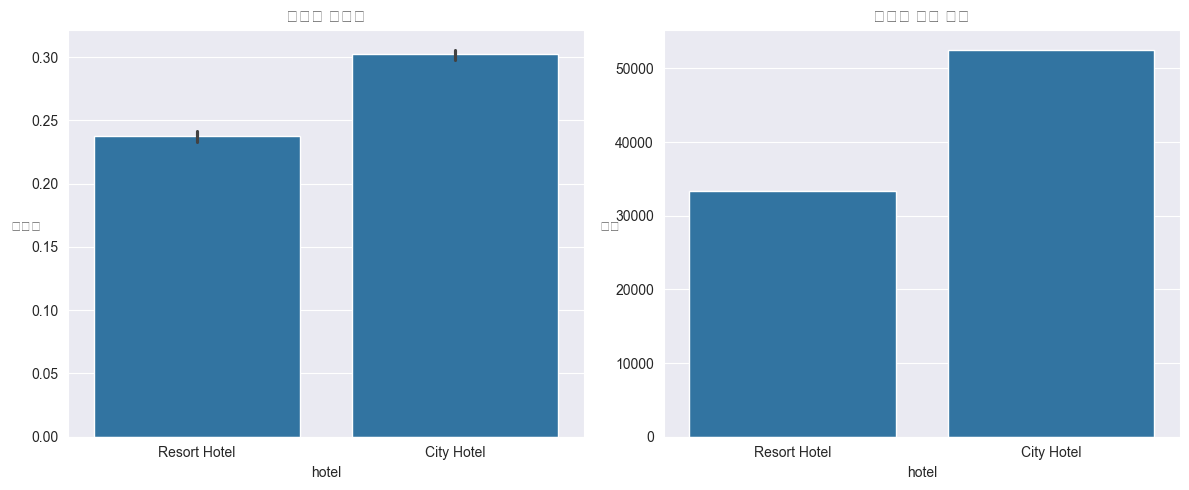

In [66]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x="hotel", y="is_canceled")
plt.title("호텔별 취소율")
plt.ylabel("취소율", rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="hotel")
plt.title("호텔별 예약 건수")
plt.ylabel("건수", rotation=0)

plt.tight_layout()
plt.show()

# lead_time과의 관계 찾아보기
- 0 ~ 50 일정도가 절반이 넘는듯
## lead_time이 길수록 취소율이 높을 것이다. / 너무 먼 미래니깐 -> 맞음
city hotel의 경우 도착일이 550일을 넘어가면 무조건 취소함

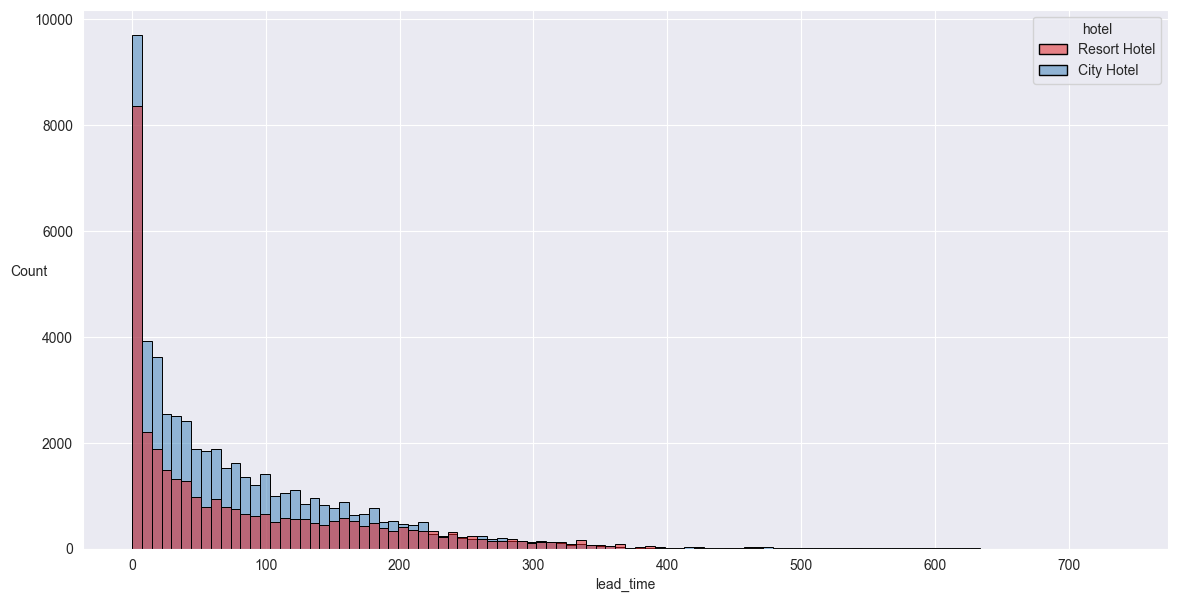

In [67]:
# 전체 리드 타임 확인, 취소된 카운트 아님
plt.figure(figsize=(14,7))
sns.histplot(x = 'lead_time' ,hue='hotel', bins=100, edgecolor='black', data = df,palette='Set1')
plt.ylabel("Count", rotation=0)
plt.show()

In [68]:
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=[-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, df['lead_time'].max()])

/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) 

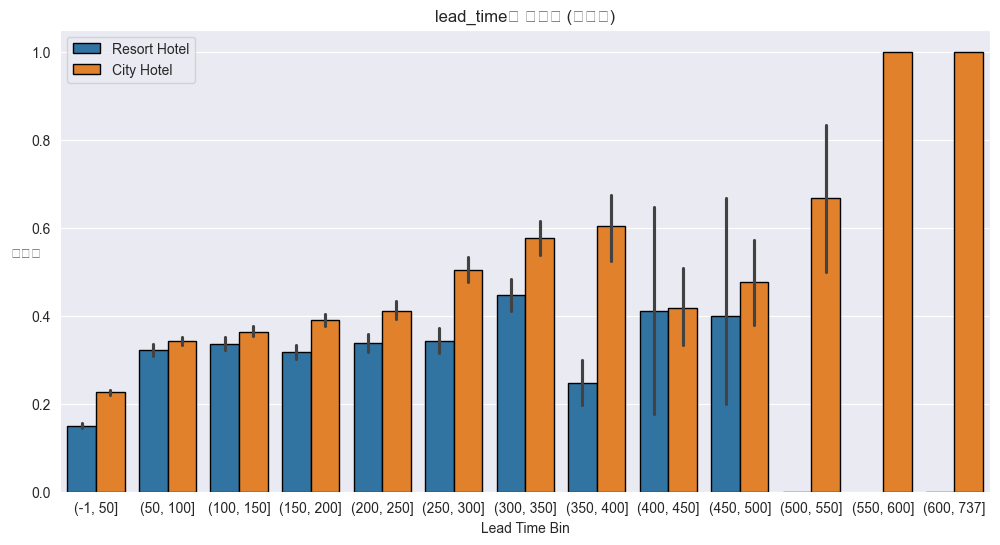

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='lead_time_bin',
    y='is_canceled',
    hue='hotel',        # 호텔별 색 구분
    edgecolor='black',
)
plt.title("lead_time별 취소율 (호텔당)")
# plt.grid()
plt.ylabel("취소율",rotation=0)
plt.legend()
plt.xlabel("Lead Time Bin")
plt.show()
# 실제로 리드 타임이 길 수록 취소율이 조금씩 더 높은 거 같음
# 회색 막대기 어케 치우더라...

# 연도별 취소율 (호텔당)
3. 연도 별로는 취소율이 별 상관 없을 거 같다. / 코로나도 19년도 1월 시작. -> 아님. 시간이 지날수록 취소율이 올라감....왜징
- 2015는 7/1 부터
- 2016은 1년
- 2017은 8/31 까지
라서 개수에 차이는 있겠지만

비율은 17, 16, 15 순이니깐
### 여름이면 취소가 잘 되고 겨울이면 취소가 잘 안 난다...? 라는 가정도 될 거 같음 --> 특정달(6,7,8)에 취소가 잘 날거다?

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3993034652.py:18: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3993034652.py:18: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3993034652.py:18: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3993034652.py:18: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3993034652.py:18: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3993034652.py:18: User

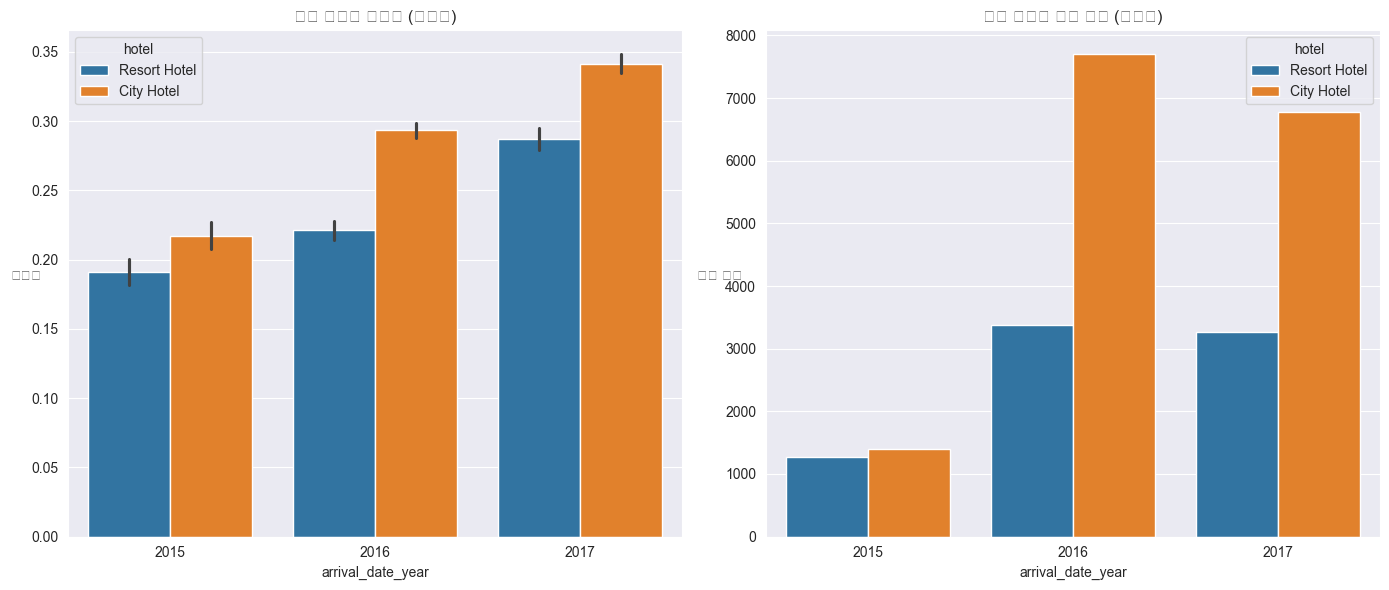

In [70]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data = df, x = 'arrival_date_year', y = 'is_canceled', hue='hotel') # 17년도가 가장 높음
plt.ylabel("취소율",rotation=0)
plt.title("도착 연도별 취소율 (호텔당)")


plt.subplot(1,2,2)
sns.countplot(data=df[df['is_canceled']==1],    # 16년도가 가장 많음
              x='arrival_date_year',
              hue='hotel')
plt.title("도착 연도별 취소 개수 (호텔당)")
plt.xlabel("arrival_date_year")
plt.ylabel("취소 개수",rotation=0)



plt.tight_layout()
plt.show()

# 2015는 7/1 부터
# 2016은 1년
# 2017은 8/31 까지

# 특정 Month(여름, 연말)에 예약 건수가 높고 취소율이 낮을 것이다. / 휴가를 받으니깐
### 여름이면 취소가 잘 되고 겨울이면 취소가 잘 안 난다...? 라는 가정도 될 거 같음 --> 특정달(6,7,8,9)에 취소가 잘 날거다? 이것도 확인 가능
### 리조트 호텔의 경우  **7,8 월**에 취소율이 다른 월에 비해 높음
### city hotel은 음 ...

### 월별이면 라인그래프가 나을듯?

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3985968407.py:25: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data = cancel_rate_2015, x = 'arrival_date_month', y = 'is_canceled',hue='hotel', color = 'red', edgecolor='black')
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3985968407.py:30: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data = cancel_rate_2016, x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', edgecolor='black', color = 'red')
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3985968407.py:35: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data = cancel_rate_2017,

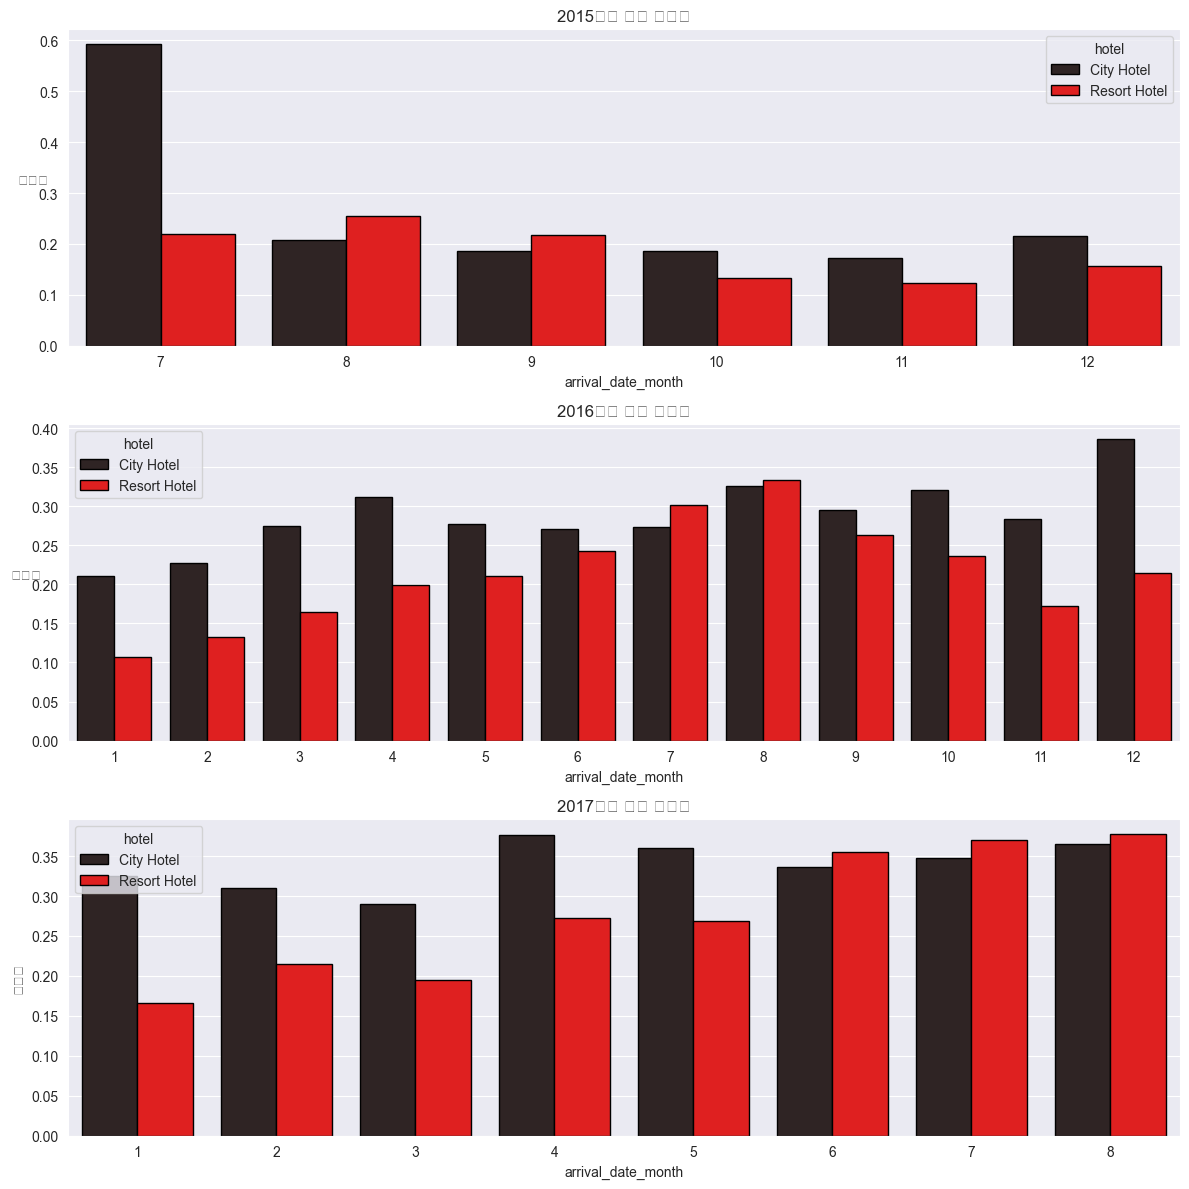

In [71]:
df_2015 = df[df['arrival_date_year'] == 2015]
cancel_rate_2015 = (
    df_2015.groupby(['arrival_date_month','hotel'])['is_canceled']
    .mean()
    .reset_index()
)
# 2016년
df_2016 = df[df['arrival_date_year'] == 2016]
cancel_rate_2016 = (
    df_2016.groupby(['arrival_date_month','hotel'])['is_canceled']
    .mean()
    .reset_index()
)

# 2017년
df_2017 = df[df['arrival_date_year'] == 2017]
cancel_rate_2017 = (
    df_2017.groupby(['arrival_date_month','hotel'])['is_canceled']
    .mean()
    .reset_index()
)
# 2015년도 월별 취소
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.barplot(data = cancel_rate_2015, x = 'arrival_date_month', y = 'is_canceled',hue='hotel', color = 'red', edgecolor='black')
plt.ylabel("취소율",rotation=0)
plt.title("2015년도 월별 취소율")

plt.subplot(3,1,2)
sns.barplot(data = cancel_rate_2016, x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', edgecolor='black', color = 'red')
plt.title("2016년도 월별 취소율")
plt.ylabel("취소율",rotation=0)

plt.subplot(3,1,3)
sns.barplot(data = cancel_rate_2017, x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', edgecolor='black', color = 'red')
plt.title("2017년도 월별 취소율")
plt.ylabel("취소율")

plt.tight_layout()
plt.show()

# 토~일(2)일수록 평일이 0일 일수록 취소율이 낮을 것이다. / 주말에 쉬고 평일에 일 가니깐 -> 맞음
# 월~금(5)일수록 취소율이 높을 것이다.  / 평일에 일 가야할 수도 -> 맞음
- 주말이 평일보단 예약 취소율이 적게 나오긴함.
- 평일이 길어질 수록 예약 취소율이 상승하는 경향이 있음

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/2446617331.py:54: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/2446617331.py:54: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/2446617331.py:54: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/2446617331.py:54: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/2446617331.py:54: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/2446617331.py:54: User

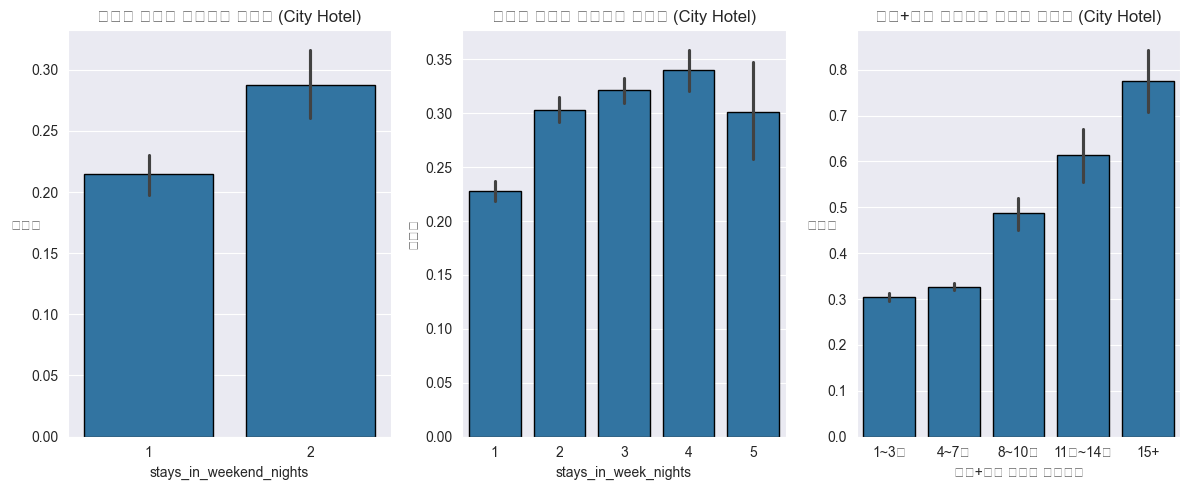

In [72]:
# 주말만 예약한 사람들 (City Hotel)
only_weekend = df[
    (df['stays_in_weekend_nights'] >= 1) &
    (df['stays_in_week_nights'] == 0) &
    (df['hotel'] == "City Hotel")
]

# 평일만 예약한 사람들 (City Hotel)
only_week = df[
    (df['stays_in_weekend_nights'] == 0) &
    (df['stays_in_week_nights'] >= 1) &
    (df['hotel'] == "City Hotel")
]

# 평일+주말 모두 포함된 사람들 (City Hotel)
week_plus_weekend = df[
    (df['stays_in_weekend_nights'] >= 1) &
    (df['stays_in_week_nights'] >= 1) &
    (df['hotel'] == "City Hotel")
].copy()

week_plus_weekend['total_nights'] = (
    week_plus_weekend['stays_in_week_nights'] + week_plus_weekend['stays_in_weekend_nights']
)

bins = [0, 3, 7, 10, 14, week_plus_weekend['total_nights'].max()]
labels = ['1~3일', '4~7일', '8~10일', '11일~14일', '15+']
week_plus_weekend['total_nights_bin'] = pd.cut(
    week_plus_weekend['total_nights'], bins=bins, labels=labels
)


plt.figure(figsize=(12,5))

# 주말만 예약
plt.subplot(1,3,1)
plt.title("주말만 예약한 사람들의 취소율 (City Hotel)")
sns.barplot(data=only_weekend, x='stays_in_weekend_nights', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

# 평일만 예약
plt.subplot(1,3,2)
plt.title("평일만 예약한 사람들의 취소율 (City Hotel)")
sns.barplot(data=only_week, x='stays_in_week_nights', y='is_canceled', edgecolor='black')
plt.ylabel("취소율")

# 평일+주말
plt.subplot(1,3,3)
plt.title("평일+주말 숙박일수 구간별 취소율 (City Hotel)")
sns.barplot(data=week_plus_weekend, x='total_nights_bin', y='is_canceled', edgecolor='black')
plt.xlabel("평일+주말 껴있는 숙박일수")
plt.ylabel("취소율", rotation=0)

plt.tight_layout()
plt.show()

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3675191519.py:54: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3675191519.py:54: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3675191519.py:54: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3675191519.py:54: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3675191519.py:54: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3675191519.py:54: User

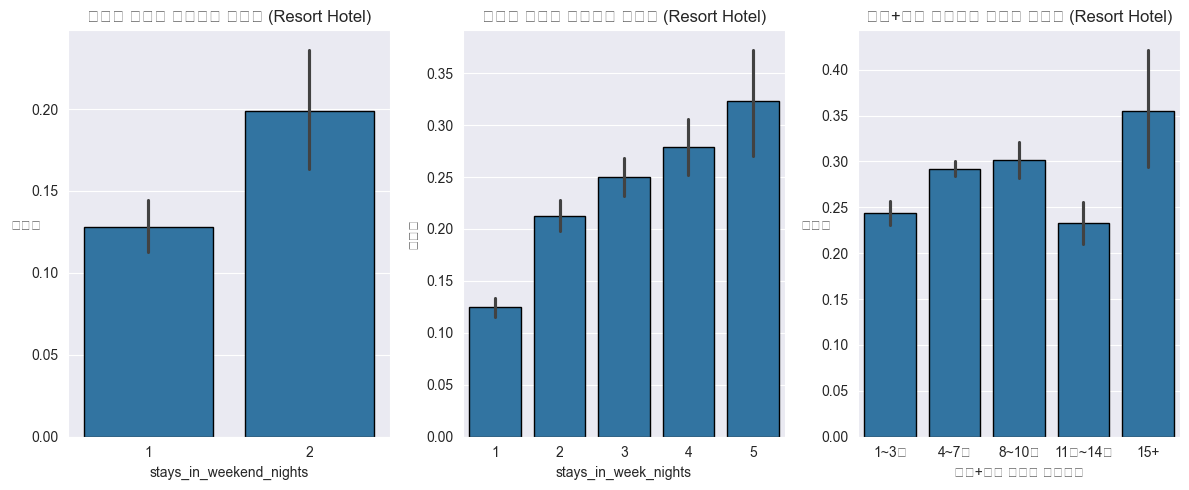

In [73]:
# 주말만 예약한 사람들 (Resort Hotel)
only_weekend_resort = df[
    (df['stays_in_weekend_nights'] >= 1) &
    (df['stays_in_week_nights'] == 0) &
    (df['hotel'] == "Resort Hotel")
]

# 평일만 예약한 사람들 (Resort Hotel)
only_week_resort = df[
    (df['stays_in_weekend_nights'] == 0) &
    (df['stays_in_week_nights'] >= 1) &
    (df['hotel'] == "Resort Hotel")
]

# 평일+주말 모두 포함된 사람들 (Resort Hotel)
week_plus_weekend_resort = df[
    (df['stays_in_weekend_nights'] >= 1) &
    (df['stays_in_week_nights'] >= 1) &
    (df['hotel'] == "Resort Hotel")
].copy()
# 주말 + 평일 껴있는 컬럼 추가
week_plus_weekend_resort['total_nights'] = (
    week_plus_weekend_resort['stays_in_week_nights'] + week_plus_weekend_resort['stays_in_weekend_nights']
)

bins = [0, 3, 7, 10, 14, week_plus_weekend_resort['total_nights'].max()]
labels = ['1~3일', '4~7일', '8~10일', '11일~14일', '15+']
week_plus_weekend_resort['total_nights_bin'] = pd.cut(
    week_plus_weekend_resort['total_nights'], bins=bins, labels=labels
)


plt.figure(figsize=(12,5))

# 주말만 예약
plt.subplot(1,3,1)
plt.title("주말만 예약한 사람들의 취소율 (Resort Hotel)")
sns.barplot(data=only_weekend_resort, x='stays_in_weekend_nights', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

# 평일만 예약
plt.subplot(1,3,2)
plt.title("평일만 예약한 사람들의 취소율 (Resort Hotel)")
sns.barplot(data=only_week_resort, x='stays_in_week_nights', y='is_canceled', edgecolor='black')
plt.ylabel("취소율")

# 평일+주말
plt.subplot(1,3,3)
plt.title("평일+주말 숙박일수 구간별 취소율 (Resort Hotel)")
sns.barplot(data=week_plus_weekend_resort, x='total_nights_bin', y='is_canceled', edgecolor='black')
plt.xlabel("평일+주말 껴있는 숙박일수")
plt.ylabel("취소율",rotation=0)

plt.tight_layout()
plt.show()

# 예약된 어른이 많을수록 취소가 높을 것이다. (개인 사정으로 인한) / 어른이라면
- 어른이 0명일때가 가장 많음
- 특히 어른이 없고 아이가 있을 때
- 1 -> 3명으로 갈 수록 다시 취소율 증가함

# 어린이, 아기가 많을 수록 취소가 높을 것이다. /  뭐 아파서,,, 애가 덜 커서
- 어린이가 많을 수록 취소율이 올라감
- 아기가 많을 수록 취소율이 내려감 (City)
- Resort의 경우엔 babies의 영향 없는 거 같음.


/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3436499312.py:24: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3436499312.py:24: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3436499312.py:24: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3436499312.py:24: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3436499312.py:24: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3436499312.py:24: Use

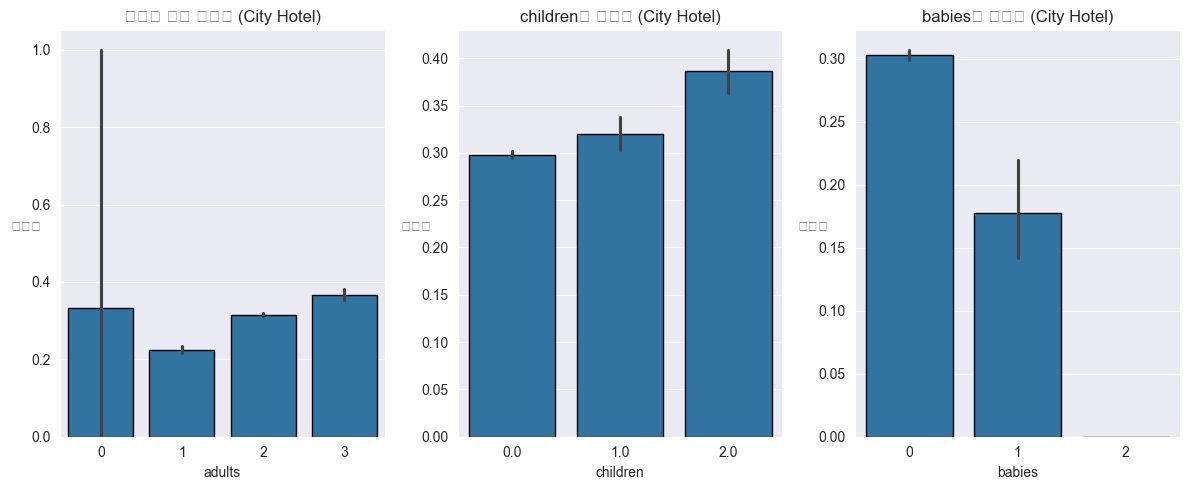

In [74]:
# City Hotel
df_city = df[df['hotel'] == "City Hotel"]

plt.figure(figsize=(12,5))

# 어른 수와 취소율
plt.subplot(1,3,1)
plt.title("어른의 수와 취소율 (City Hotel)")
sns.barplot(data=df_city, x='adults', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

# children과 취소율
plt.subplot(1,3,2)
plt.title("children과 취소율 (City Hotel)")
sns.barplot(data=df_city, x='children', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

# babies와 취소율
plt.subplot(1,3,3)
plt.title("babies와 취소율 (City Hotel)")
sns.barplot(data=df_city, x='babies', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

plt.tight_layout()
plt.show()

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3283487957.py:24: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3283487957.py:24: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3283487957.py:24: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3283487957.py:24: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3283487957.py:24: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3283487957.py:24: Use

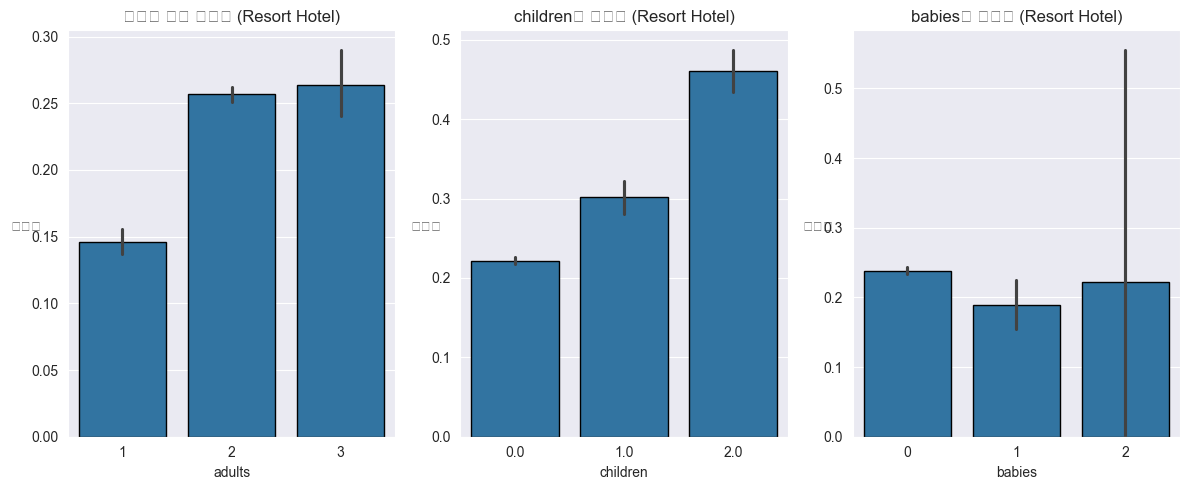

In [75]:
# 리조트 호텔에서
df_resort = df[df['hotel'] == "Resort Hotel"]

plt.figure(figsize=(12,5))

# 어른 수와 취소율
plt.subplot(1,3,1)
plt.title("어른의 수와 취소율 (Resort Hotel)")
sns.barplot(data=df_resort, x='adults', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

# children과 취소율
plt.subplot(1,3,2)
plt.title("children과 취소율 (Resort Hotel)")
sns.barplot(data=df_resort, x='children', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

# babies와 취소율
plt.subplot(1,3,3)
plt.title("babies와 취소율 (Resort Hotel)")
sns.barplot(data=df_resort, x='babies', y='is_canceled', edgecolor='black')
plt.ylabel("취소율", rotation=0)

plt.tight_layout()
plt.show()

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3311728285.py:21: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3311728285.py:21: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3311728285.py:21: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3311728285.py:21: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3311728285.py:21: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3311728285.py:21: Use

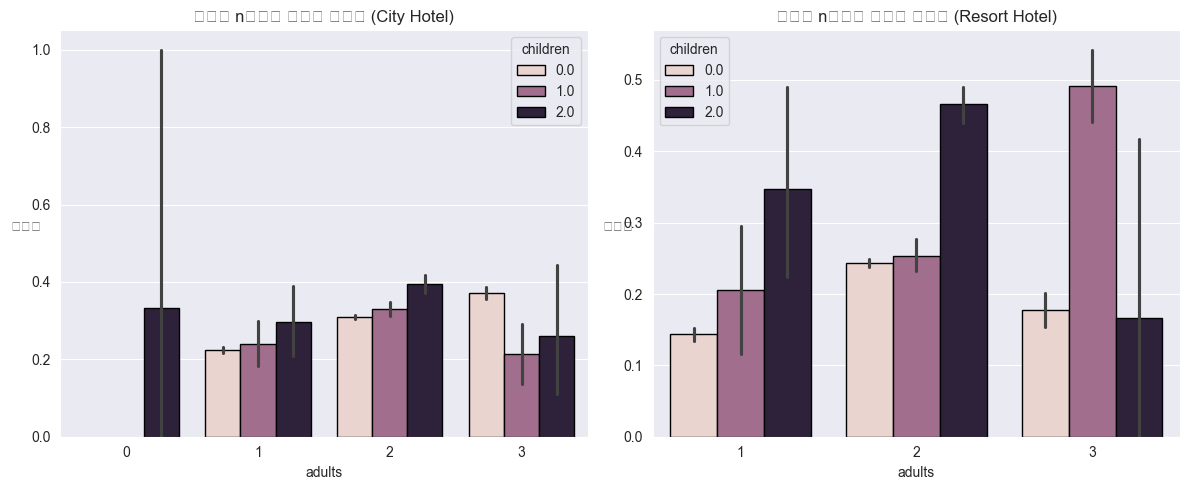

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("어른이 n명일때 아이별 취소율 (City Hotel)")
sns.barplot(
    data=df[df['hotel']=="City Hotel"],
    x='adults', y='is_canceled', hue='children',
    edgecolor='black'
)
plt.ylabel("취소율", rotation=0)



plt.subplot(1,2,2)
plt.title("어른이 n명일때 아이별 취소율 (Resort Hotel)")
sns.barplot(
    data=df[df['hotel']=="Resort Hotel"],
    x='adults', y='is_canceled', hue='children',
    edgecolor='black'
)
plt.ylabel("취소율", rotation=0)
plt.tight_layout()
plt.show()


# 아 보기 ㅈㄴ 어렵네
# 어른이 없고 아이가 2명일때
#

# 개도국일 수록 취소율이 높을것임 / 일 해야해서...
분류 어케하지

# 이전에 방문을 안 했던 손님일수록 취소율이 높을 것이다. / 이미 온 사람이면 아예 예약 안 하거나, 좋아서 또옴

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3950910518.py:20: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3950910518.py:20: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3950910518.py:20: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3950910518.py:20: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3950910518.py:20: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/3950910518.py:20: Us

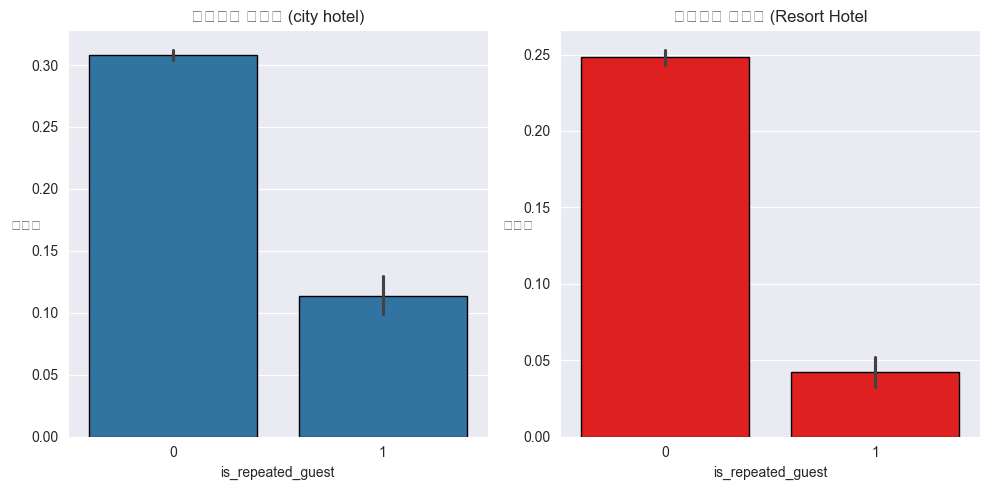

In [77]:
# 시티 호텔을 이전에 온 적이 있는 사람이라면
is_repeated_df_city = df[(df['hotel'] == "City Hotel")]
is_repeated_df_resort = df[df['hotel'] == "Resort Hotel"]


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("재방문별 취소율 (city hotel)")
sns.barplot(data = is_repeated_df_city, x='is_repeated_guest', y='is_canceled', edgecolor='black')
plt.ylabel("취소율",rotation=0)




plt.subplot(1,2,2)
plt.title("재방문별 취소율 (Resort Hotel")
sns.barplot(data = is_repeated_df_resort, x='is_repeated_guest', y='is_canceled', edgecolor='black',color='red')
plt.ylabel("취소율",rotation=0)

plt.tight_layout()
plt.show()

# 예약한 룸 타입 - 배정된 룸 타입 이 다르다면 취소율이 높을 것이다. / 내가 원하는 방 아니니깐
취소율 순서
L은 6개임. 이상치로 봐야할듯.
e->h로갈때 가장 많음

/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/502426777.py:20: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/502426777.py:20: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/502426777.py:20: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/502426777.py:20: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/502426777.py:20: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/53/bz6j7ttj061dc4fqzd1ygd_m0000gn/T/ipykernel_57408/502426777.py:20: UserWarnin

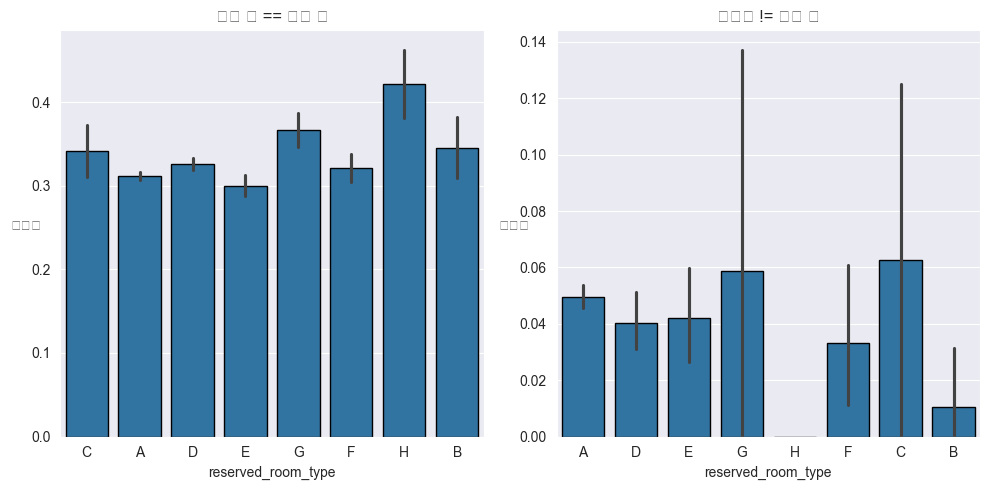

In [109]:
room_equal_df = df[  (df['reserved_room_type']) == (df['assigned_room_type']) ]
room_differ_df = df[ (df['reserved_room_type']) != (df['assigned_room_type']) ]

# L 삭제
df = df.drop(df[df['reserved_room_type'] == 'L'].index)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("예약 룸 == 배정 룸")
sns.barplot(data = room_equal_df, x = 'reserved_room_type', y = 'is_canceled', edgecolor='black')
plt.ylabel("취소율",rotation=0)


plt.subplot(1,2,2)
# 어디에서 어디로 바꼈는지 알 수 없음.
plt.title("예약룸 != 배정 룸")
sns.barplot(data = room_differ_df, x = 'reserved_room_type', y = 'is_canceled', edgecolor='black')
plt.ylabel("취소율",rotation = 0)

plt.tight_layout()
plt.show()


In [110]:
# 예약과 배정이 같으면 same, 다르면 diff
df['room_change'] = df['reserved_room_type'] + "->" + df['assigned_room_type']
df['room_equal'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI})

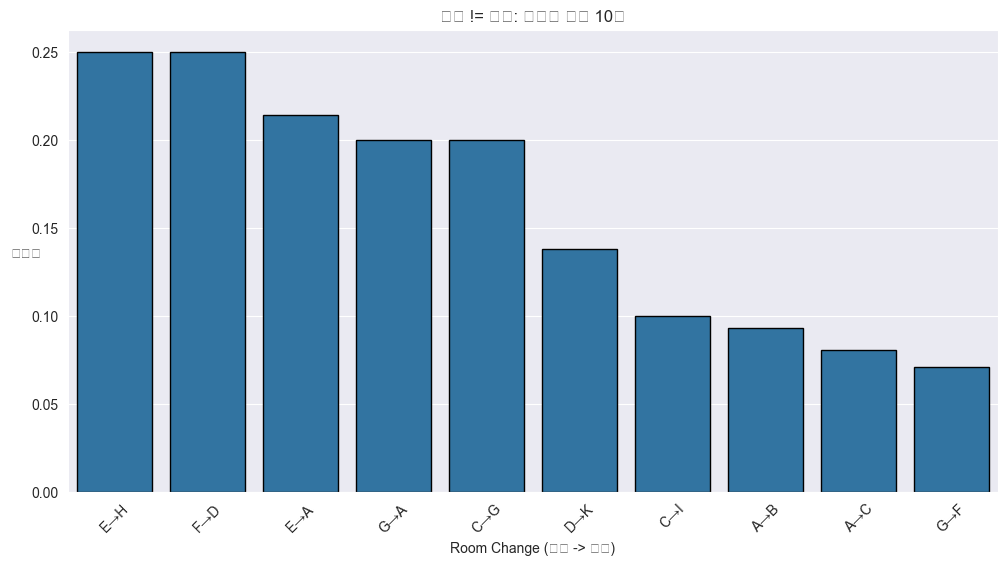

In [112]:
# 예약 != 배정만 만들기
room_diff_df = df[df['reserved_room_type'] != df['assigned_room_type']]

# room_change 별 취소율 계산
room_diff_cancel = (
    room_diff_df.groupby('room_change')['is_canceled'].mean().sort_values(ascending=False).head(10)
    # 상위 10개
)

plt.figure(figsize=(12,6))
plt.title("예약 != 배정: 취소율 상위 10개")
sns.barplot(x=room_diff_cancel.index, y=room_diff_cancel.values, edgecolor="black")
plt.xticks(rotation=45)
plt.ylabel("취소율", rotation=0)
plt.xlabel("Room Change (예약 -> 배정)")
plt.show()

# 호텔에서 뭘 해야되냐
- 리드타임이 길면 취소율 상승 -> 취소 수수료 받기
- 예약 != 배정 룸타입이 다를 시 상위 10개의 조합은 피해서 주기
- 특별 요청이 많을수록 방문할거같음 -> 요청사항 잘 들어주기
- 재방문 고객 취소율 낮음 -> 혜택 더 주기